# Digital Humanities 140 Final Project
## An Analysis of F. Scott Fitzgerald's *The Great Gatsby*
#### Muthu Palaniappan, Winter 2023
#### 3/18/22

### Introduction
For my final project, I will be analyzing the novel *The Great Gatsby* by F. Scott Fitzgerald. The [source](https://www.gutenberg.org/cache/epub/64317/pg64317.txt) for my project is The Gutenberg Project, which has provided the text of the novel. 

Fitzgerald's *The Great Gatsby* is my favorite novel, and I first read it in a high school English class. I was enamored by the themes of love and the American dream as well as the lively setting and time period. During my first read of the book, I analyzed the texts from a literary standpoint. Now, I hope to perform a literary analysis from a statistical point of view. Using the raw text of the novel, I ask "What are the overal moods and themes of the novel?" and "How does the sentiment of the novel reflect the historical time period that it was set in?"

### Methods
#### Data Processing and Analytical Process
As stated earlier, my dataset is the raw text of *The Great Gatsby* provided by Project Gutenberg. The first step in my data processing was to capture and store the text of the novel. I used the Python `requests` library, which allows us to use a target url and extract the text from the webpage. Project Gutenberg stores the text in a textfile format, so this was straightforward. From there, I did some simple processing like lowering the case of all of the letters and removing the Project Gutenberg text additions to the page. What remained was one long string with the text of *The Great Gatsby*. Using this string, I created a Python list where each element is a word from the string. 

Stopwords are a list of words that are commonly filtered out before natural language processing since they are insignificant. Example stopwords are "are", "is", "the", and "the". The Python Natural Language Tool Kit provides a list of stopwords for a specified language. So, anytime I was processing the words from the Novel and testing their sentiment/frequencies, I filtered out stopwords.

Fitzgerald divided his novel into 9 chapters, and the chapters are titled as roman numerals in the text. I decided to split up the string of words into 9 separate strings corresponding to each chapter so I could compare them. 

Using the list of all words in the novel and the 9 lists of words in each chapter, minus the stop words, I performed my data analysis. I used the Vader sentiment analyzer, the word frequencies, the positive/negative word lexicon, and the Porter Stemmer to draw various conclusions and make comparisons.  

In [55]:
import requests
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [56]:
target_url = "https://www.gutenberg.org/cache/epub/64317/pg64317.txt"
response = requests.get(target_url)
gatsby_string = response.text
gatsby_string = gatsby_string.split('*** START OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY ***')[1]
gatsby_string = gatsby_string.split('*** END OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY ***')[0]
gatsby_string = gatsby_string.lower()


In [57]:
stopwords_list = stopwords.words('english')
# print(stopwords_list)
sia = vader.SentimentIntensityAnalyzer()

In [58]:
gatsby_word_list = [w for w in word_tokenize(gatsby_string.lower())]

In [59]:
reviewPolarity = 0.0
pos_list = []
neg_list = []
for word in gatsby_word_list:
  val = sia.polarity_scores(word)['compound']
  if val > 0:
    pos_list.append(word)
  elif val < 0:
    neg_list.append(word)
print(pos_list[0:10])
print(neg_list[0:10])

['great', 'lover', 'lover', 'like', 'advantages', 'great', 'curious', 'matter', 'hope', 'tolerance']
['cry', 'vulnerable', 'criticizing', 'victim', 'bores', 'accused', 'hostile', 'missing', 'forget', 'snobbishly']


In [60]:
top15_pos = nltk.FreqDist(pos_list).most_common(15)
top15_neg = nltk.FreqDist(neg_list).most_common(15)

print(top15_pos)
print(top15_neg)

[('like', 119), ('hand', 63), ('want', 59), ('well', 53), ('good', 30), ('great', 26), ('love', 24), ('god', 20), ('matter', 19), ('loved', 19), ('friend', 18), ('party', 18), ('won', 17), ('better', 17), ('bright', 16)]
[('no', 97), ('miss', 38), ('cried', 31), ('alone', 25), ('demanded', 24), ('broke', 23), ('stopped', 19), ('hard', 17), ('shook', 17), ('crazy', 14), ('stop', 13), ('bad', 11), ('leave', 11), ('lost', 11), ('killed', 11)]


In [61]:
no_stopwords = [w for w in word_tokenize(gatsby_string.lower()) if w not in stopwords_list]

reviewPolarity = 0.0
pos_list = []
neg_list = []
for word in no_stopwords:
  val = sia.polarity_scores(word)['compound']
  if val > 0:
    pos_list.append(word)
  elif val < 0:
    neg_list.append(word)
top15_pos = nltk.FreqDist(pos_list).most_common(15)
top15_neg = nltk.FreqDist(neg_list).most_common(15)

print(top15_pos)
print(top15_neg)

[('like', 119), ('hand', 63), ('want', 59), ('well', 53), ('good', 30), ('great', 26), ('love', 24), ('god', 20), ('matter', 19), ('loved', 19), ('friend', 18), ('party', 18), ('better', 17), ('bright', 16), ('yes', 16)]
[('miss', 38), ('cried', 31), ('alone', 25), ('demanded', 24), ('broke', 23), ('stopped', 19), ('hard', 17), ('shook', 17), ('crazy', 14), ('stop', 13), ('bad', 11), ('leave', 11), ('lost', 11), ('killed', 11), ('dead', 11)]


### Results for Top Positive/Negative Words using Raw Polarity Score
In the above section I determined what the 15 most frequent positively conotated and negatively conotated words in the novel. First, I separated the words in the novel by polarity scores, negative indicating a negative sentiment and positive indicating a positive sentiment. From there, I used the frequency distributor from NLTK to return the top 15 in each category. I did this twice, once with stop words and once with stop words removed. The results from the two iterations were nearly the same, with the only stop word in the first iteration of positive words being "won", and the only stop word in the negative list being "no". The top 15 positive and negative words are outputted above. 

In [62]:
stemmer = PorterStemmer()
unstemmed = [w for w in word_tokenize(gatsby_string.lower()) if w not in stopwords_list]
stemmed = []
for word in unstemmed:
  stemmed.append(stemmer.stem(word))

reviewPolarity = 0.0
pos_list = []
neg_list = []
for word in stemmed:
  val = sia.polarity_scores(word)['compound']
  if val > 0:
    pos_list.append(word)
  elif val < 0:
    neg_list.append(word)
top15_pos = nltk.FreqDist(pos_list).most_common(15)
top15_neg = nltk.FreqDist(neg_list).most_common(15)

print(top15_pos)
print(top15_neg)

[('like', 128), ('hand', 103), ('want', 97), ('love', 56), ('well', 53), ('good', 30), ('great', 26), ('laugh', 25), ('matter', 24), ('play', 24), ('friend', 24), ('reach', 23), ('smile', 22), ('care', 21), ('god', 20)]
[('miss', 42), ('stop', 35), ('demand', 28), ('broke', 23), ('hard', 17), ('shook', 17), ('drop', 14), ('kill', 12), ('bad', 11), ('lost', 11), ('dead', 11), ('forget', 10), ('low', 10), ('violent', 10), ('interrupt', 10)]


### Results for Top Positive/Negative Words using Raw Polarity Score and Porter Stemmer
In this section above, I did a nearly identical analysis as the prior section. The only difference this time around was that I used stemmed words instead of the raw word. From their documentation, the Porter Stemmer "removed the commoner morphological and inflexional endings from words in English." For example, the words "lover", "lovely", and "loved" would all boil down to the stem "love". After this analysis, I noticed slightly different results than before. For instance in the positive word list, "love" is more frequent after being stemmed, and "smile" and "care" made it onto the list after being stemmed. In the negative word list, "stop" moved up in frequency after being stemmed. 

The results were not wildly different after being stemmed, but it was interesting to notice the slight change. 

In [63]:
first_ch_string = 'In my younger and more vulnerable years'
second_ch_string ='About halfway between West Egg and New York the motor road hastily'
third_ch_string ='There was music from my neighbour’s house through the summer nights.'
fourth_ch_string = 'On Sunday morning while church bells'
fifth_ch_string = 'When I came home to West Egg that night'
sixth_ch_string = 'About this time an ambitious young reporter from New York'
seventh_ch_string ='It was when curiosity about Gatsby was at its highest'
eighth_ch_string = 'I couldn’t sleep all night; a foghorn'
ninth_ch_string = 'After two years I remember the rest of that day'

first_ch_index = gatsby_string.find(first_ch_string.lower())
second_ch_index = gatsby_string.find(second_ch_string.lower())
third_ch_index = gatsby_string.find(third_ch_string.lower())
fourth_ch_index = gatsby_string.find(fourth_ch_string.lower())
fifth_ch_index = gatsby_string.find(fifth_ch_string.lower())
sixth_ch_index = gatsby_string.find(sixth_ch_string.lower())
seventh_ch_index = gatsby_string.find(seventh_ch_string.lower())
eighth_ch_index = gatsby_string.find(eighth_ch_string.lower())
ninth_ch_index = gatsby_string.find(ninth_ch_string.lower())
print(first_ch_index)
print(second_ch_index)
print(third_ch_index)
print(fourth_ch_index)
print(fifth_ch_index)
print(sixth_ch_index)
print(seventh_ch_index)
print(eighth_ch_index)
print(ninth_ch_index)


531
34325
58543
91906
123277
147460
170873
221476
247570


<BarContainer object of 9 artists>

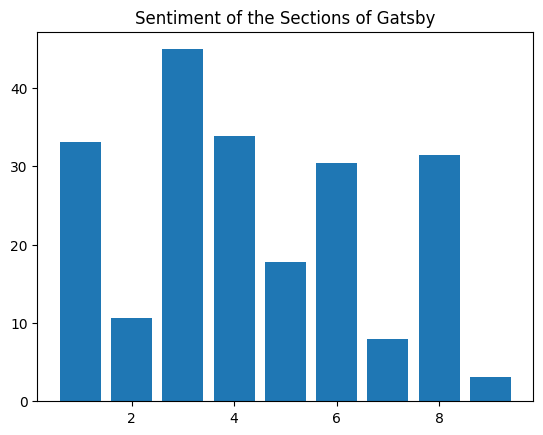

In [64]:
score_arr = []

gatsby_sections = []
gatsby_sections.append(gatsby_string[first_ch_index:second_ch_index])
gatsby_sections.append(gatsby_string[second_ch_index:third_ch_index])
gatsby_sections.append(gatsby_string[third_ch_index:fourth_ch_index])
gatsby_sections.append(gatsby_string[fourth_ch_index:fifth_ch_index])
gatsby_sections.append(gatsby_string[fifth_ch_index:sixth_ch_index])
gatsby_sections.append(gatsby_string[sixth_ch_index:seventh_ch_index])
gatsby_sections.append(gatsby_string[seventh_ch_index:eighth_ch_index])
gatsby_sections.append(gatsby_string[eighth_ch_index:ninth_ch_index])
gatsby_sections.append(gatsby_string[ninth_ch_index:])

pos_score_per_section = [0,0,0,0,0,0,0,0,0]
neg_score_per_section = [0,0,0,0,0,0,0,0,0]
section_scatters = []
for section in range(len(gatsby_sections)):
  section_list = [w for w in word_tokenize(gatsby_sections[section].lower()) if w not in stopwords_list]
  section_points = []
  score = 0
  pos_val = 0
  neg_val = 0
  for word in section_list:
    val = sia.polarity_scores(word)['compound']
    score += val
    if (val >= 0):
      pos_val += val
    else:
      neg_val += val
    if val != 0:
      section_points.append(val)
  pos_score_per_section[section] = pos_val
  neg_score_per_section[section] = neg_val*-1
  section_scatters.append(section_points)
  score_arr.append(score)

x_coordinate = [ 1+i for i in range(len(score_arr)) ]
plt.title('Sentiment of the Sections of Gatsby')
plt.bar(x_coordinate, score_arr)


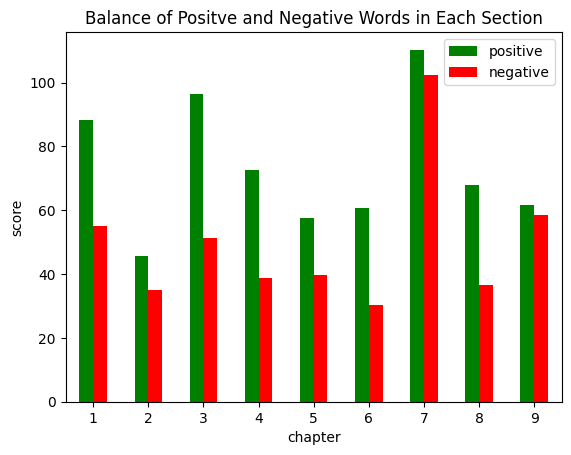

In [65]:
pos_series = pd.Series(pos_score_per_section, index=[1,2,3,4,5,6,7,8,9])
neg_series = pd.Series(neg_score_per_section, index=[1,2,3,4,5,6,7,8,9])
df = pd.DataFrame({"positive":pos_score_per_section,"negative":neg_score_per_section})
ax = df.plot.bar(color=["Green","Red"], rot=0, title="Balance of Positve and Negative Words in Each Section")
ax.set_xlabel("chapter")
ax.set_ylabel("score")
ax.xaxis.set_major_formatter(plt.FixedFormatter([1,2,3,4,5,6,7,8,9]))
plt.show()


### Results for Sentiment in each Section based on Raw Score
Above, I calculated the positivity score and negativity score of each chapter of the novel. The first graph with single bars uses a single score for each section. Positive and negative sentiment scores for each word in the section are added to a sum and plotted. In the second graph with double bars, I kept separate counts for the positive score and negative score for each chapter. Both are important representations, but I think that the double bar graph allows us to visualize the balance of positive to negative words in each chapter.

In [66]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

<BarContainer object of 9 artists>

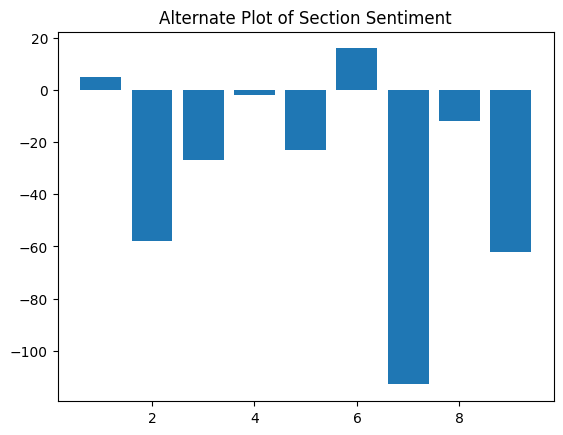

In [67]:
score_arr = []
pos_score_per_section = [0,0,0,0,0,0,0,0,0]
neg_score_per_section = [0,0,0,0,0,0,0,0,0]
for section in range(len(gatsby_sections)):
  section_list = [w for w in word_tokenize(gatsby_sections[section].lower()) if w not in stopwords_list]
  score = 0
  pos_val = 0
  neg_val = 0
  for word in section_list:
    if word in positive_words:
      score += 1
      pos_val += 1
    elif word in negative_words:
      score -= 1
      neg_val += 1
  pos_score_per_section[section] = pos_val
  neg_score_per_section[section] = neg_val
  score_arr.append(score)

x_coordinate = [ 1+i for i in range(len(score_arr)) ]
plt.title('Alternate Plot of Section Sentiment') 
plt.bar(x_coordinate, score_arr)

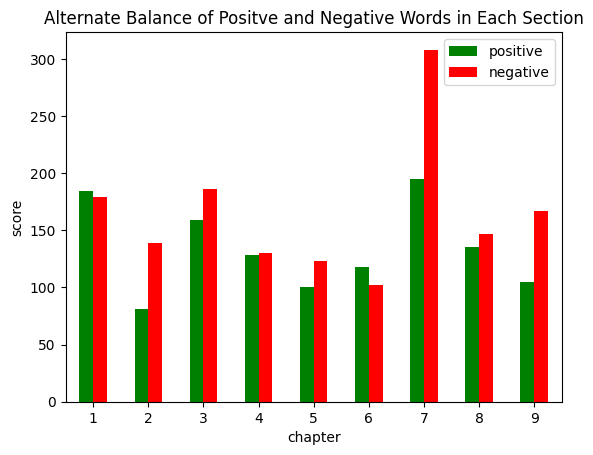

In [68]:
pos_series = pd.Series(pos_score_per_section, index=[1,2,3,4,5,6,7,8,9])
neg_series = pd.Series(neg_score_per_section, index=[1,2,3,4,5,6,7,8,9])
df = pd.DataFrame({"positive":pos_score_per_section,"negative":neg_score_per_section})
ax = df.plot.bar(color=["Green","Red"], rot=0, title="Alternate Balance of Positve and Negative Words in Each Section")
ax.set_xlabel("chapter")
ax.set_ylabel("score")
ax.xaxis.set_major_formatter(plt.FixedFormatter([1,2,3,4,5,6,7,8,9]))
plt.show()

### Results for Sentiment in each Section based on Normalized Score
Similar to the prior section, I plotted the sentiment scores for each section, but I calculated the scores differently. This time, instead of summing up the raw sentiment score, which is a decimal, I added one for a positive score (anything above zero) and subtracted 1 for a negative score (anything below zero). This normalizes the sentiment for each word, and allows us to view the balance of positive and negative words in regards to their frequencies as opposed to how positive or negative they are. The results are fairly different than the prior section, which is an interesting juxtaposition.

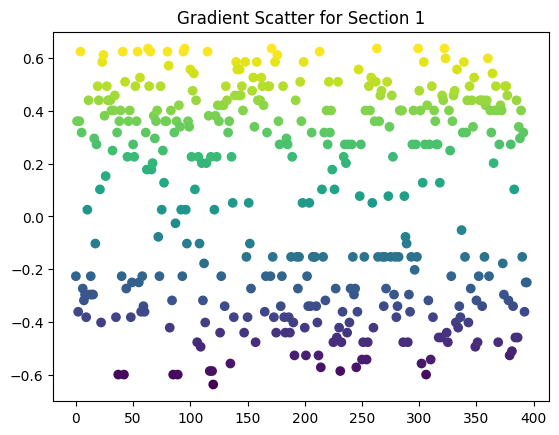

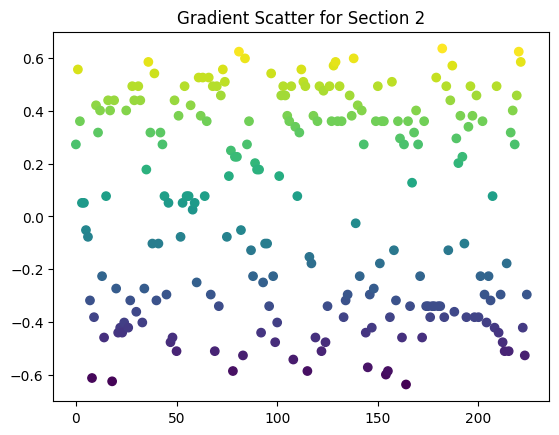

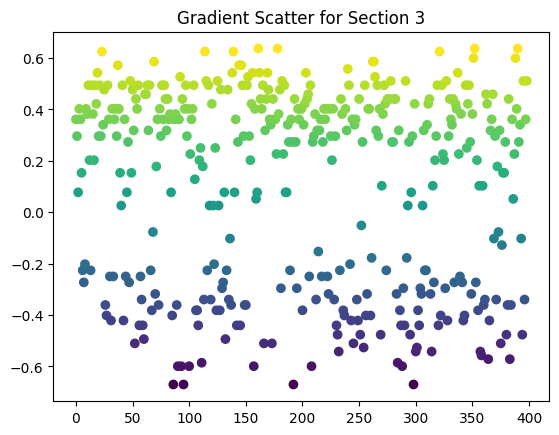

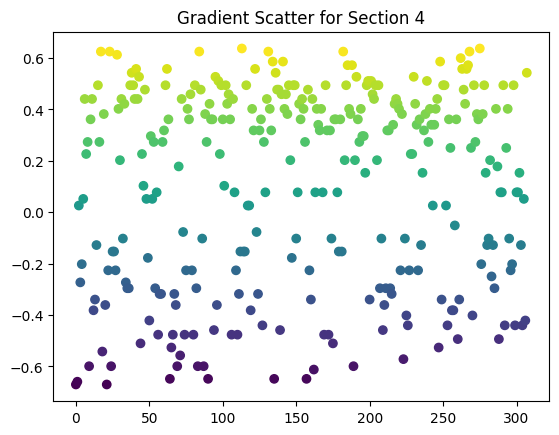

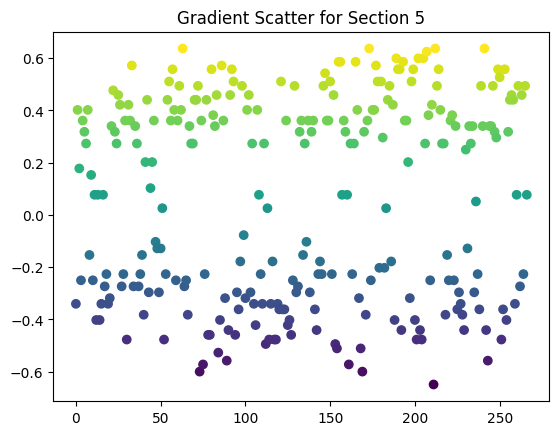

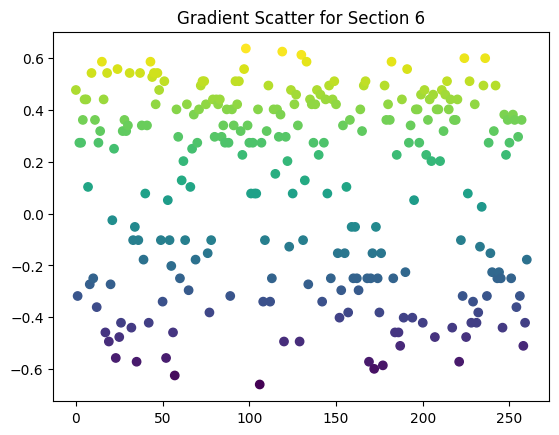

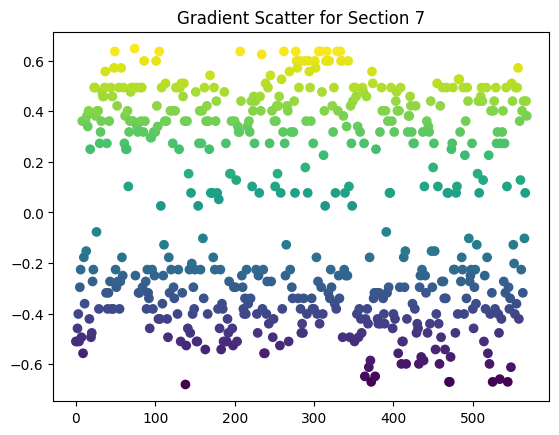

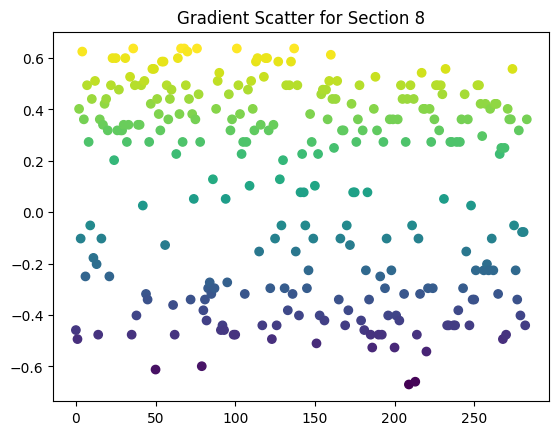

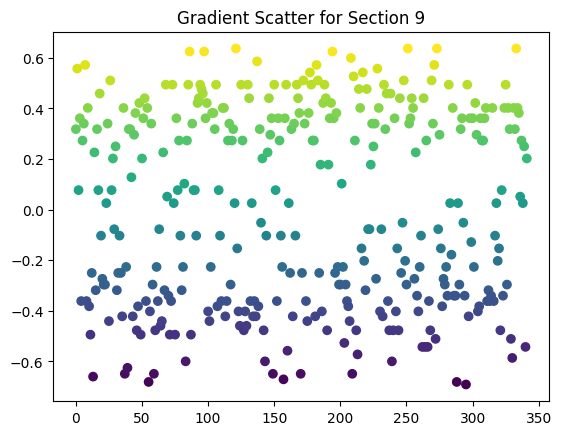

In [69]:
for i in range(9):
#   plt.scatter(np.linspace(0,100,len(section_scatters[i])), section_scatters[i], c=section_scatters[i])
  plt.scatter(range(len(section_scatters[i])), section_scatters[i], c=section_scatters[i])
  plt.title(f"Gradient Scatter for Section {i+1}")
  plt.show()

### Results for Sentiment Scatterplot per Section
In this section, I tried to plot the sentiment scores for each chapter of the novel. I used a color gradient based on the decimal score of the word's sentiment. I thought each plot would be more varied, but in truth they look pretty similar. The notible differences are that the plots for chapter 3 and 7 are more dense, meaning they contain more polarizing words. Other than that, these graphs tell me that there are a varied spread of positive and negative words. I don't think these plots deliver too much information, but I was curious if the color gradient would be skewed strongly towards a certain color for some of the chapters.

In [70]:
x = [w for w in word_tokenize(gatsby_string.lower()) if w not in stopwords_list and w.isalnum()]
# new_words= [word for word in words if word.isalnum()]
df = pd.DataFrame({'words': nltk.FreqDist(x).keys(),
                   'frequencies': nltk.FreqDist(x).values()})    

In [71]:
df.head()
# print(df.describe())

,words,frequencies
0,great,26
1,gatsby,251
2,scott,1
3,fitzgerald,1
4,table,31


In [72]:
print(df.describe())

       frequencies
count  5483.000000
mean      4.053073
std      10.400495
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max     251.000000


In [73]:
names = ['gatsby', 'nick', 'daisy', 'tom', 'myrtle']
# df[df["words"] in names]
names_df = df.loc[df['words'].isin(names)]
names_df.head()

,words,frequencies
1,gatsby,251
547,tom,188
549,daisy,183
899,nick,24
1757,myrtle,23


<AxesSubplot: title={'center': 'Frequencies of Character Names'}, xlabel='names'>

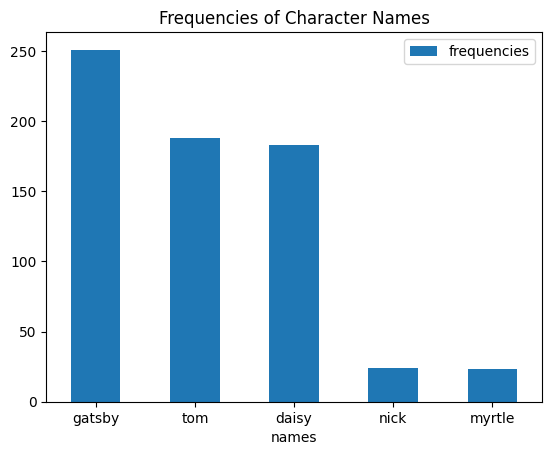

In [74]:
names_df.plot.bar(x='words', y='frequencies', rot=0, title='Frequencies of Character Names', xlabel='names')

### Results for Name Frequency in Novel
In this section

In [75]:
top_10_words = df.nlargest(10, 'frequencies')
print(top_10_words)

      words  frequencies
1    gatsby          251
298    said          233
547     tom          188
549   daisy          183
184     one          145
40     like          119
79     came          108
147    back          107
118  little          103
164     man           98


In [76]:
top10_pos_words = []
top10_neg_words = []
for i in range(10):
    top10_pos_words.append(top15_pos[i][0])
    top10_neg_words.append(top15_neg[i][0])
    
pos_df = df.loc[df['words'].isin(top10_pos_words)]
pos_df.head()


,words,frequencies
0,great,26
40,like,119
114,matter,19
713,hand,63
816,laugh,9


In [77]:
neg_df = df.loc[df['words'].isin(top10_neg_words)]
neg_df.head()

,words,frequencies
140,hard,17
831,miss,38
939,drop,4
1055,broke,23
1121,bad,11


<AxesSubplot: title={'center': 'Frequencies of Top 10 Positive Words'}, xlabel='words'>

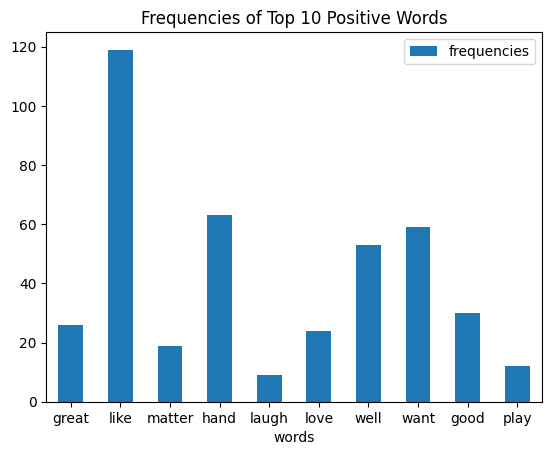

In [78]:
pos_df.plot.bar(x='words', y='frequencies', rot=0, title='Frequencies of Top 10 Positive Words')

<AxesSubplot: title={'center': 'Frequencies of Top 10 Negative Words'}, xlabel='words'>

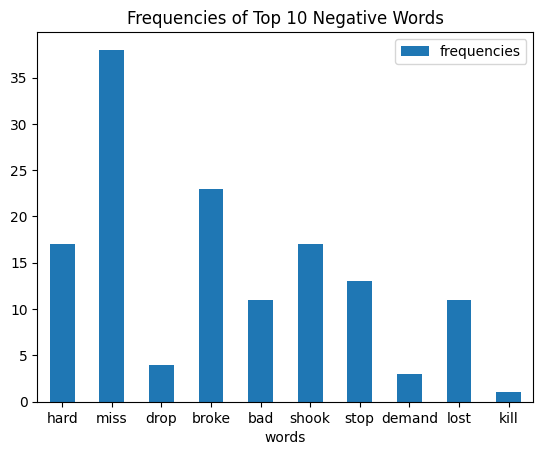

In [79]:
neg_df.plot.bar(x='words', y='frequencies', rot=0, title='Frequencies of Top 10 Negative Words')

### Results for Word Frequency Analysis
In this section, I looked into the word frequencies in the novel. There are over 5000 unique words in the novel, with the average frequency being around 4 times. I looked into the frequencies of names of main characters in the novel. Gatsby is the name that appears most often, followed by Tom, Daisy, and Nick. Originally, I was planning on examining sentences that these names appeared in to analyze the overal sentiment of that sentence. I thought this could tell us about the reputation and theme of the character. I decided this might be difficult though, since a sentence mentioning a name may not be representative of reputation/theme. For instance, a lot of the name occurrences may be in phrases like "Gatsby sad" or other verb phrases, which wouldn't reveal anything insightful.

I determined what the most frequent 10 words in the novel are: gatsby, said, tom, daisy, one, like, came, back, little, man. I also looked into the split of positive and negative words in the novel and found the top 10 frequent words in those lists. The most frequent positive words are: great, like, matter, hand, laugh, love, well, want, good, play. The most frequent negative words are: hard, miss, drop, broke, bad, shook, stop, demand, lost, kill.

## Discussion
Based on the word frequencies and sentiment visualizations, we can draw conclusions about the themes/mood of the novel and the overall sentiment arc of the story based on its chapters. This is also reflective of the setting of the novel: the Roaring 20s in New York City. If we look at the most frequent words in the novel, there are three names: Gatsby, Daisy, and Tom. The novel famously contains a love triangle between these three characters, and the data aligns. Other than those names, some notable frequent words were "back", "man", and "one". Although these words are definitely part of phrases that have significance, it is interesting that those single words appeared so much. *The Great Gatsby* is a story about Jay Gatsby, a man that came into money and had a haunting past. A common theme in the book is his longing for another character, Daisy. The word "one" frequently appearing could allude to the idea that Gatsby was always obsessed with the idea of Daisy being his "one" and him coming into so much money and ambition with the singular goal of catching just Daisy's eye. The word "back" could allude to the themes of the past, present, and future that Fitzgerald wrote about in his novel. The book famously ends with the quote "So we beat on, boats against the current, borne back ceaselessly into the past." The words "past" and "back" may refer to each other. 

Another interesting conclusion comes from the breakdown of the 10 most frequent positive words and 10 most frequent negative words in the book. Amongst the positive words are "great", "love", and "play" which I think are three words that perfectly describe the life of the wealthy during the Roaring 20s in America. Especially in the novel, wealthy characters like Gatsby and Daisy host and attend "great" lavish parties, "play" music, sports, and games, and spend their time chasing "love". Amongst the negative words are "broke", "kill", and "miss". During the 20s, the wealth gap was massive. Many families lived paycheck to paycheck and in worse parts of town, alluding to the word "broke". In Gatsby, a character dies and another character is famously framed, hence the presence of "kill". Lastly, the word "miss" refers to the theme of longing and absence Gatsby often felt about Daisy. 

The last visualizations I would like to discuss are the sentiment charts separated by chapters in the book. Chapter 7 has the most number of positive and negative words, with the balance being skewed very negative when looking at the normalized scores. This is the climax of the book and where (spoiler alert!) Myrtle is killed, so it makese sense that the sentiment is heavily negative. Chapter 1 is the only chapter where the normalized positive word score is higher than the negative score. I conclude that this is true because we are introduced to Gatsby and his lavish parties in this chapter, and so far, we have a positive view of his life. It is also interesting because in Chapter 7, the group drives through a rough part of town with folks of lower social classes, so its sentiment is far more negative to the pretty houses and lavish parties in Chapter 1 --  a nicer portrayal of the 20s. 

Overall, this analysis aligned with my literary analysis from reading *The Great Gatsby*. It is interesting because when analyzing literary work, often one needs to read between the lines. However, when looking at the lines as raw data, we can draw similar conclusions. *The Great Gatsby* is a story about love, death, ambition, greatness, and the past/present/future, both between the lines and through the lines themselves. 